# Distribution of the data related by the following paper: 

### Investigating the effect of grain structure on compressive response of open-cell metal foam using high-fidelity crystal-plasticity modeling 

__Authors:__  _Dongfang Zhao, Kristoffer E. Matheson, Brian R. Phung, Steve Petruzza, Michael W. Czabaj, Ashley D. Spear_ 

__Published in:__  Materials Science and Engineering, Volume 812, 2021, 140847, ISSN 0921-5093

https://doi.org/10.1016/j.msea.2021.140847

https://www.sciencedirect.com/science/article/pii/S0921509321001167

In [1]:
def InstallPrerequisites():

    # Pre-requirements: install all the python libraries needed to run this exemple.
    # You may need to restart the kernel if the process catches a missing library to be installed. 
    import os,sys

    # specific prerequisite (this may need to be completed)
    !"{sys.executable}" -m pip  install --upgrade OpenVisus
    !"{sys.executable}" -m OpenVisus configure 

    # general prerequisites
    !"{sys.executable}" -m pip install PIL
    !"{sys.executable}" -m pip install urllib
    !"{sys.executable}" -m pip install matplotlib
    !"{sys.executable}" -m pip install mpl_interactions
    !"{sys.executable}" -m pip install ipywidgets
    !"{sys.executable}" -m pip install ipympl 
    !"{sys.executable}" -m pip install ipycanvas
    !"{sys.executable}" -m jupyter nbextension enable --py widgetsnbextension

    print("WARNING: you probably need to restart Jupyter")
    
InstallPrerequisites()

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
095132675 Kernel:251 37424:36948 setting VISUS_HOME C:\Users\Vlaerio's PC\Documents/visus from home directory
095132675 Kernel:341 37424:36948 VERSION GIT_REVISION 0b54bd2 VisusHome C:\Users\Vlaerio's PC\Documents/visus BinaryDirectory C:/Users/Vlaerio's PC/AppData/Roaming/Python/Python37/site-packages/OpenVisus/bin CurrentWorkingDirectory  D:/visus-cache
095132675 VisusDbPy:77 37424:36948 Registering PyMultipleDataset
Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...
-m OpenVisus configure []
sys.executable c:\program files\python37\python.exe is_conda False
Executing command ['c:\\program files\\python37\\python.e

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import os,sys
#sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
from OpenVisus import *
from ipywidgets import *
print(os.getcwd() )

Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...
D:\visus-cache


In [3]:
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from ipywidgets import HBox, Label
from ipywidgets import IntProgress
from IPython.display import display
    
num_blocks = 0
num_blocks_cached = 0
caching_progress = IntProgress(min=0, max=0,
                               layout=Layout(width='70%'))
# caching_progress_display = HBox([Label("Caching progress"+ 
#                                        "%.2f%%" % (100 * num_blocks_cached/num_blocks)+
#                                        " ("+
#                                        format(num_blocks_cached, ',d')+
#                                        "/"+
#                                        format(num_blocks, ',d')+
#                                        ")"), 
#                                  caching_progress])

caching_progress_display = HBox([Label("Caching progress                        "), 
                                 caching_progress])

def Assert(cond):
    if not cond:
        raise Exception("Assert failed")
        
def LoadImage(filename):
	if filename.startswith('http'):
		filename=urlopen(filename) 
	return numpy.asarray(Image.open(filename))

def ShowImage(data,width=10):
	ratio=float(data.shape[1])/data.shape[0]
	fig = plt.figure(figsize = (width,width*ratio))
	ax = fig.add_subplot(1,1,1)
	ax.imshow(data, origin='lower')
	plt.show()
    
# function to read data from a remote dataset
# optional parameters: timestep, field (variable in the dataset), logic_box (bounding box of the query), resolution

# Note: the resolution value could sometime fetch a dataset with the wrong aspect ratio, 
# this because in the IDX format we double the size at each resolution on only one of the axis at a time

# function to plot the image data with matplotlib
# optional parameters: colormap, existing plot to reuse (for more interactivity)
def ShowData(data, cmap=None, plot=None):
    #print(data)
    if(plot==None or cmap!=None):
        width = 6
        ratio=float(data.shape[1])/data.shape[0]
        fig = plt.figure(figsize = (width,width*ratio))
        plot = plt.imshow(data, origin='lower', cmap=cmap)
        plt.show()
        return plot
    else:
        plot.set_data(data)
        plt.show()
        return plot
    

# function to create a local dataset from a remote one (typically S3 object storage)
def EnableCaching(local_filename, remote_url):
    print("local_filename",local_filename)
    print("remote_url",remote_url)

    access_config="""
    <access type='multiplex'>
            <access type='disk' chmod='rw' url='file://{}' />
            <access type="CloudStorageAccess" url='{}' chmod="r" /> 
    </access>  
    """.format(
        local_filename.replace("&","&amp;"),
        remote_url.replace("&","&amp;")) 
    print("access_config",access_config)

    access= db.createAccessForBlockQuery(StringTree.fromString(access_config))

    # at this point the cache is enabled with the new local idx file
    Assert(os.path.isfile(local_filename))

    return access
    

# utility to copy a dataset block-by block (you can run it in the background)
def CacheAllDataset(db,access, limit, background):
    global num_blocks,num_blocks_cached, caching_progress, caching_progress_display
    
    if background:
        thread = threading.Thread(target=CacheAllDataset, args=(db,access,limit,False))
        thread.start()        
        return thread
    
    print("CacheAllDataset","...")
        
    def ReturnValue():
        access.endRead()
        print("CacheAllDataset done")
        return True
        
    access.beginRead()
        
    cont=0
    for field in db.getFields():
        for blockid in range(db.getTotalNumberOfBlocks()): 
            for time in db.getTimesteps().asVector():
                # print("Copying block","time",time,"field",field,"blockid",blockid,"...")
                buffer = db.readBlock(blockid, field=field, time=time, access=access)
                cont+=1
                num_blocks_cached = num_blocks_cached+1
                caching_progress.value = num_blocks_cached
                caching_progress_display.children[0].value = ("Caching progress "+ 
                                                              "%.2f%%" % (100 * num_blocks_cached/num_blocks)+
                                                              " ("+
                                                              format(num_blocks_cached, ',d')+
                                                              "/"+
                                                              format(num_blocks, ',d')+
                                                              ")")
                if limit>0 and cont>=limit: 
                    return ReturnValue()
                
    return ReturnValue()
    
    
print("Utilities defined")

Utilities defined


In [4]:
# create data access method from a dataset stored on the cloud
# important: you should know the layour and compression in advance
url="https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression={}&layout={}".format("zip","hzorder")
db=LoadDataset(url)
print("Loaded dataset",url)
num_blocks = len(db.getFields()) * db.getTotalNumberOfBlocks() * len(db.getTimesteps().asVector())
caching_progress.max =num_blocks

local_filename=os.path.abspath("./visus-cache/foam/visus.idx").replace("\\","/")
print("local_filename",local_filename)

Loaded dataset https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression=zip&layout=hzorder
local_filename D:/visus-cache/visus-cache/foam/visus.idx


Now you can run a background process that slowly copy blocks from remote location

In [5]:
# if you want to copy the dataset in background
if True:
    # this create also the local_filename, important to call this before LoadDataset
    local_access=EnableCaching(local_filename, url) 
    local_db=LoadDataset(local_filename)
    thread=CacheAllDataset(local_db,local_access,0,True)

local_filename D:/visus-cache/visus-cache/foam/visus.idx
remote_url https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression=zip&layout=hzorder
access_config 
    <access type='multiplex'>
            <access type='disk' chmod='rw' url='file://D:/visus-cache/visus-cache/foam/visus.idx' />
            <access type="CloudStorageAccess" url='https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression=zip&amp;layout=hzorder' chmod="r" /> 
    </access>  
    
CacheAllDataset ...


In [6]:
X_size,Y_size,Z_size = db.getLogicBox()[1]
slice_value = int(Z_size/2)

print("Database size",X_size,Y_size,Z_size )
print("slice_value",slice_value)
print("fields:",db.getFields())

Database size 1055 1024 1024
slice_value 512
fields: ['data', 'dist']


In [7]:
# create a plot for our data
access=EnableCaching(local_filename, url)
first_query = db.read(x=[slice_value,slice_value+1],y=[0,Y_size],z=[0,Z_size], num_refinements=1 , quality=-3, access = access).reshape([Y_size//2,Z_size//2])
print("First query done")

local_filename D:/visus-cache/visus-cache/foam/visus.idx
remote_url https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression=zip&layout=hzorder
access_config 
    <access type='multiplex'>
            <access type='disk' chmod='rw' url='file://D:/visus-cache/visus-cache/foam/visus.idx' />
            <access type="CloudStorageAccess" url='https://s3.us-west-1.wasabisys.com/visus-server-foam/visus.idx?compression=zip&amp;layout=hzorder' chmod="r" /> 
    </access>  
    
First query done


In [8]:
# if running this code in a Jupter notbeook or JupyterLab
# NOTE I need this cell to be one line only with only this op
%matplotlib notebook 

<IPython.core.display.Javascript object>


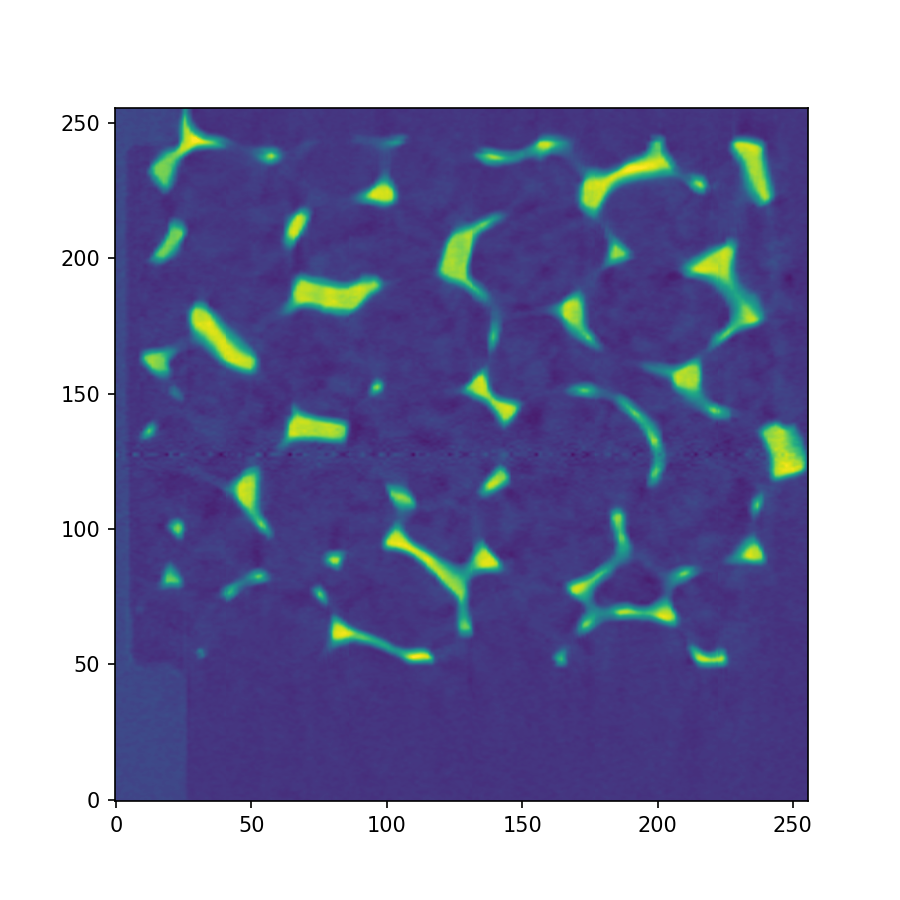

interactive(children=(IntSlider(value=0, description='time (0-3)', layout=Layout(width='60%'), max=3), Dropdow…

'Interactive slicing of dataset retrieved from the cloud and cached locally in: D:/visus-cache/visus-cache/foam/visus.idx'

In [10]:
# create a plot for our data
myplot = ShowData(first_query)
slice_dir = 0
resolution = 2
#myplot = None
width = 6
#ratio=float(data.shape[2])/data.shape[1])
#fig = plt.figure(figsize = (width,width*ratio))

layout_width = '60%'
time  =widgets.IntSlider(value=0,min=0,max=3,step=1,description="time (0-3)",
                             layout=Layout(width=layout_width))
style = {'description_width': 'initial'}
direction_names = [('X', 0), ('Y', 1), ('Z', 2)]
direction = widgets.Dropdown(options=direction_names, value=0,description='Slice orthogonal to axis:',style=style,
                             layout=Layout(width=layout_width))
xslice=widgets.IntSlider(value=500,min=0,max=X_size-1,step=1,description="slice (0-"+str(X_size-1)+")",
                             layout=Layout(width=layout_width))
res_widget =widgets.IntSlider(value=-2,min=-5,max=0,step=1,description="Resolution (coarse=-5,full=0)",style=style,
                             layout=Layout(width=layout_width))

# function to plot the image data with matplotlib
# optional parameters: colormap, existing plot to reuse (for more interactivity)
def ShowSlice(time=0,direction = slice_dir,slice_position=700,new_resolution = resolution,db=db, cmap=None, plot=myplot):
    global myplot, first_query, slice_dir, xslice, resolution, direction_names
    plot = myplot
    if  slice_dir != direction :    
        xslice.max = db.getLogicBox()[1][direction]-1        
        xslice.value = 512
        xslice.description = "slice (0-"+str(xslice.max)+")"
        
    slice_dir  = direction
    resolution = new_resolution
    
    data_quality = resolution *2
    New_quality = new_resolution*3
    size_denominator = int(2**(new_resolution*-1))
    
    actual_slice_position = slice_position //size_denominator
    actual_slice_position = actual_slice_position *size_denominator
    
    res_names = ["(coarsest)","(coarser)","(coarse)","(medium)","(fine)","(full)"]
    print("Time=",time,
          ", Direction=", direction_names[direction][0],
          ", Slice=",actual_slice_position, 
          ", Resolution=",new_resolution, res_names[5+new_resolution])
    try:
        if  slice_dir == 0:  
                data = db.read(time=time, 
                    x=[actual_slice_position,actual_slice_position+1],
                    y=[0,Y_size],
                    z=[0,Z_size], 
                    num_refinements=1 , 
                    quality=New_quality, 
                    access = access).reshape([Y_size//size_denominator,Z_size//size_denominator])
        elif slice_dir == 1:
                data = db.read(time=time, 
                    x=[0,Y_size],
                    y=[actual_slice_position,actual_slice_position+1],
                    z=[0,Z_size], 
                    num_refinements=1 , 
                    quality=New_quality, 
                    access = access).reshape([Y_size//size_denominator,Z_size//size_denominator])
        else :
                data = db.read(time=time, 
                    x=[0,Y_size],
                    y=[0,Z_size], 
                    z=[actual_slice_position,actual_slice_position+1],
                    num_refinements=1 , 
                    quality=New_quality, 
                    access = access).reshape([Y_size//size_denominator,Z_size//size_denominator])
            
    except:
        data = first_query
    first_query = data
    if(plot==None or cmap!=None):
        print("===================== PROBLEM!!!! =======================================")
        return plot
    else:
        plot.set_data(data)
        plt.show()

# reuse the plot with an interact for varying time and resolution values
interact(lambda time, direction,xslice, res_widget: ShowSlice(time, direction,xslice, res_widget), 
         time  = time, direction = direction, xslice=xslice, res_widget = res_widget)

display(caching_progress_display)

"Interactive slicing of dataset retrieved from the cloud and cached locally in: "+local_filename